In [1]:
from addons.stock_manage.service import StockDataLoader, Stocks
from addons.stock_manage.models.stock_manage import StockDailyBS, StockDailyLeaveBS, StockDailyBuyPoint
import datetime
stocks = Stocks().get_stocks()
today = datetime.date.today()
day = today + datetime.timedelta(days=1)
for stock in stocks:
    d = StockDataLoader(stock, '2022-01-01', f'{day}')
    res = d.get_stack_daily()
    try:
        d.add_ema(res)
        new = res[['ts_code', 'trade_date', 'buy_signal', 'sell_signal']].to_dict('records')[-1]
        if f'{new["trade_date"]}' != f'{today}':
            continue
        res = StockDailyBS.insert(new).execute()
        print("stock1:", stock , res)
    except Exception as e:
        print("stock:", stock , e)
        continue
for stock in stocks:
    d = StockDataLoader(stock, '2022-01-01', f'{day}')
    res = d.get_stack_daily()
    try:
        d.add_leave_top(res)
        new = res[['ts_code', 'trade_date', 'buy_signal', 'sell_signal', 'dynamic_line']].to_dict('records')[-1]
        if f'{new["trade_date"]}' != f'{today}':
            continue
        res = StockDailyLeaveBS.insert(new).execute()
        print("stock2:", stock , res)
    except Exception as e:
        print("stock:", stock , e)
        continue
for stock in stocks:
    d = StockDataLoader(stock, '2022-01-01', f'{day}')
    res = d.get_stack_daily()
    try:
        d.add_buy_point(res)
        new = res[['ts_code', 'trade_date', 'buy_signal', 'build_area_signal']].to_dict('records')[-1]
        if f'{new["trade_date"]}' != f'{today}':
            continue
        res = StockDailyBuyPoint.insert(new).execute()
        print("stock3:", stock , res)
    except Exception as e:
        print("stock:", stock , e)
        continue


stock1: 000001.SZ 12155126
stock1: 000002.SZ 12155127
stock1: 000004.SZ 12155128
stock1: 000005.SZ 12155129
stock1: 000006.SZ 12155130
stock1: 000007.SZ 12155131
stock1: 000008.SZ 12155132
stock1: 000009.SZ 12155133
stock1: 000010.SZ 12155134
stock1: 000011.SZ 12155135
stock1: 000012.SZ 12155136
stock1: 000014.SZ 12155137
stock1: 000016.SZ 12155138
stock1: 000017.SZ 12155139
stock1: 000019.SZ 12155140
stock1: 000020.SZ 12155141
stock1: 000021.SZ 12155142
stock1: 000023.SZ 12155143
stock1: 000025.SZ 12155144
stock1: 000026.SZ 12155145
stock1: 000027.SZ 12155146
stock1: 000028.SZ 12155147
stock1: 000029.SZ 12155148
stock1: 000030.SZ 12155149
stock1: 000031.SZ 12155150
stock1: 000032.SZ 12155151
stock1: 000034.SZ 12155152
stock1: 000035.SZ 12155153
stock1: 000036.SZ 12155154
stock1: 000037.SZ 12155155
stock1: 000038.SZ 12155156
stock1: 000039.SZ 12155157
stock1: 000040.SZ 12155158
stock1: 000042.SZ 12155159
stock1: 000045.SZ 12155160
stock1: 000046.SZ 12155161
stock1: 000048.SZ 12155162
s

In [1]:
from addons.stock_manage.service import StockDataLoader, Stocks
from addons.stock_manage.models.stock_manage import StockDailyBuyPoint
import datetime
stocks = Stocks().get_stocks()
today = datetime.date.today()
day = today + datetime.timedelta(days=1)
for stock in stocks:
    d = StockDataLoader(stock, '2000-01-01', f'{day}')
    res = d.get_stack_daily()
    try:
        d.add_buy_point(res)
        new = res[['ts_code', 'trade_date', 'buy_signal', 'build_area_signal']].to_dict('records')
        res = StockDailyBuyPoint.insert_many(new, ['ts_code', 'trade_date', 'buy_signal', 'build_area_signal']).execute()
        print("stock:", stock , res)
    except Exception as e:
        print("err stock:", stock , e)
        continue


stock: 000001.SZ <peewee.ModelTupleCursorWrapper object at 0x000002123EC42BC0>
stock: 000002.SZ <peewee.ModelTupleCursorWrapper object at 0x000002123EC95150>
stock: 000004.SZ <peewee.ModelTupleCursorWrapper object at 0x0000021241AF4CA0>
stock: 000005.SZ <peewee.ModelTupleCursorWrapper object at 0x0000021241926EC0>
stock: 000006.SZ <peewee.ModelTupleCursorWrapper object at 0x0000021241B70160>
stock: 000007.SZ <peewee.ModelTupleCursorWrapper object at 0x000002123EC427D0>
stock: 000008.SZ <peewee.ModelTupleCursorWrapper object at 0x00000212412BD540>
stock: 000009.SZ <peewee.ModelTupleCursorWrapper object at 0x0000021241664100>
stock: 000010.SZ <peewee.ModelTupleCursorWrapper object at 0x000002123EC42E60>
stock: 000011.SZ <peewee.ModelTupleCursorWrapper object at 0x00000212412BD300>
stock: 000012.SZ <peewee.ModelTupleCursorWrapper object at 0x0000021241B780D0>
stock: 000014.SZ <peewee.ModelTupleCursorWrapper object at 0x00000212412BD150>
stock: 000016.SZ <peewee.ModelTupleCursorWrapper obj

In [3]:
from addons.stock_manage.service import StockDataLoader, Stocks
from addons.stock_manage.models.stock_manage import StockDailyLeaveBS
import datetime
stocks = Stocks().get_stocks()
today = datetime.date.today()
day = today + datetime.timedelta(days=1)
for stock in stocks:
    d = StockDataLoader(stock, '2000-01-01', f'{day}')
    res = d.get_stack_daily()
    try:
        d.add_leave_top(res)
        print(1)
        new = res[['ts_code', 'trade_date', 'buy_signal', 'sell_signal', 'dynamic_line']].to_dict('records')
        res = StockDailyLeaveBS.insert_many(new, ['ts_code', 'trade_date', 'buy_signal', 'sell_signal', 'dynamic_line']).execute()
        print("stock:", stock , res)
    except Exception as e:
        print("err stock:", stock , e)
        continue


#     break

1
stock: 000001.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2DD9CA30>
1
stock: 000002.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2CED80D0>
1
stock: 000004.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2DC1BEB0>
1
stock: 000005.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2CB6B610>
1
stock: 000006.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E28E983A0>
1
stock: 000007.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E28E983A0>
1
stock: 000008.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2C3B7C40>
1
stock: 000009.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2CF1C070>
1
stock: 000010.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2DC1BD30>
1
stock: 000011.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E28EFFC70>
1
stock: 000012.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2DD9F520>
1
stock: 000014.SZ <peewee.ModelTupleCursorWrapper object at 0x0000029E2C45FF70>
1
stock: 000016.SZ <peewee.M

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
302    10.15
303    10.60
304    11.10
305    12.09
306    12.72
Name: low, Length: 307, dtype: float64
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
302    16.92
303    16.92
304    16.92
305    16.92
306    16.92
Name: high, Length: 307, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
302    3.224552
303    2.770174
304    2.550077
305    1.874560
306    1.315212
Length: 307, dtype: float64
0      False
1      False
2      False
3      False
4      False
       ...  
302    False
303    False
304    False
305    False
306    False
Length: 307, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
302     True
303     True
304     True
305     True
306     True
Length: 307, dtype: bool


ValueError: x and y must have same first dimension, but have shapes (1, 11) and (11,)

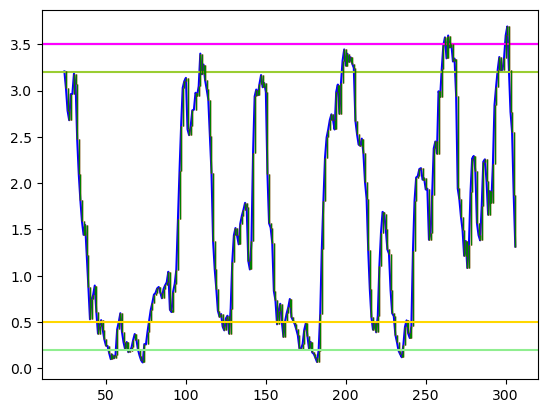

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
low = res['low']
high = res['high']
close = res['close']

# 计算最近10个交易日的最低价
low10 = low.rolling(window=10).min()
print(low10)
# 计算最近25个交易日的最高价
high25 = high.rolling(window=25).max()
print(high25)
# 计算动力线
power_line = pd.Series((close-low10)/(high25-low10)*4).ewm(span=4).mean()
print(power_line)
up_filter = power_line > power_line.shift(1)
down_filter = power_line <= power_line.shift(1)
print(up_filter)
print(down_filter)
# 绘制动力线
plt.plot(power_line, color='blue')

# 绘制阶段卖出点位
plt.axhline(y=3.2, color='yellowgreen')
plt.axhline(y=3.5, color='darkblue')

# 绘制清仓卖出点位
plt.axhline(y=3.5, color='fuchsia')
# 绘制动力线的上升趋势
plt.vlines(x=power_line.index[1:], ymin=power_line.shift(1)[1:], ymax=power_line[1:], colors='red', linewidth=1)

# 绘制动力线的下降趋势
plt.vlines(x=power_line.index[1:], ymin=power_line[1:], ymax=power_line.shift(1)[1:], colors='green', linewidth=1)
# 绘制底部
plt.axhline(y=0.2, color='lightgreen')

# 绘制关注点
plt.axhline(y=0.5, color='gold')

# 标记买入和卖出点位
plt.plot(np.where((power_line > 0.5) & (power_line.shift(1) <= 0.5)), power_line[(power_line > 0.5) & (power_line.shift(1) <= 0.5)]+0.02, '^', color='green', markersize=8)
plt.plot(np.where((power_line < 0.5) & (power_line.shift(1) >= 0.5)), power_line[(power_line < 0.5) & (power_line.shift(1) >= 0.5)]+0.02, 'v', color='red', markersize=8)
plt.plot(np.where((power_line > 3.5) & (power_line.shift(1) <= 3.5)), power_line[(power_line > 3.5) & (power_line.shift(1) <= 3.5)]+0.02, '^', color='red', markersize=8)
plt.plot(np.where((power_line < 3.5) & (power_line.shift(1) >= 3.5)), power_line[(power_line < 3.5) & (power_line.shift(1) >= 3.5)]+0.02, 'v', color='green', markersize=8)

# 绘制强弱分界线
plt.axhline(y=1.75, linestyle=':', color='lightgreen')

# 绘制动力线数值
plt.text(power_line.index[-1], power_line[-1], f'{power_line[-1]:.2f}', ha='left', va='center', color='gray')

plt.show()



In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
def classification_tc(df: pd.DataFrame):
    X = df[['Open-Close', 'High-Low', 'Val_Norm', 'Amount_Norm']]
    y = df["target_cls"]
    return (X, y)
X, y = classification_tc(res)
#将数据集拆分为训练集与验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#创建一个KNN实例，n_neighbors取95
knn_clf = KNeighborsClassifier(n_neighbors=95)
#使用KNN拟合训练集
knn_clf.fit(X_train, y_train)
#输出模型在训练集中的准确率
print(knn_clf.score(X_train, y_train))
#输出模型在验证集中的准确率
print(knn_clf.score(X_test, y_test))

res['Predict_Signal'] = knn_clf.predict(X)
#在数据集中添加一个字段，用当日收盘价除以前一日收盘价，并取其自然对数
res['Return'] = np.log(res['close']/res['pre_close'])
#查看一下
print(res.tail())

0.5541907514450867
0.5086705202312138
        ts_code  trade_date   open   high    low  close  pre_close  pct_chg  \
5185  000001.SZ  2023-01-17  15.13  15.18  14.77  14.97      15.08  -0.7294   
5186  000001.SZ  2023-01-18  14.95  15.18  14.91  15.11      14.97   0.9352   
5187  000001.SZ  2023-01-19  15.13  15.25  14.87  15.09      15.11  -0.1324   
5188  000001.SZ  2023-01-20  15.16  15.24  15.00  15.13      15.09   0.2651   
5189  000001.SZ  2023-01-30  15.60  15.74  14.89  15.15      15.13   0.1322   

      change         vol  ...  buy_signal  sell_signal  Open-Close  High-Low  \
5185   -0.11   935834.54  ...           1            0        0.16      0.41   
5186    0.14   718434.03  ...           1            0       -0.16      0.27   
5187   -0.02   641875.20  ...           1            0        0.04      0.38   
5188    0.04   608590.08  ...           1            0        0.03      0.24   
5189    0.02  1374317.50  ...           1            0        0.45      0.85   

      

In [2]:
from addons.stock_manage.service import DataLoader, Stocks
buy_stock = []
sell_stock = []
s = Stocks()
stocks = s.query_stocks()
for raw in stocks:
    stock = raw.ts_code
    print("开始计算股票：", stock, "的买卖信号")
    d = DataLoader(stock, '2022-06-01', '2023-03-31')
    res = d.get_stack_daily()
    d.add_ema(res)
    try:
        buy_signal = res.iloc[-1]["buy_signal"]
    except:
        buy_signal = 0
    try:
        sell_signal = res.iloc[-1]["sell_signal"]
    except:
        sell_signal = 0
    print(stock, " buy_signal:", buy_signal, " sell_stock:", sell_signal)
    if buy_signal == 1:
        buy_stock.append(f"{stock}-{raw.name}")
    if sell_signal == 1:
        sell_stock.append(f"{stock}-{raw.name}")
    print(stock,"计算完成!")
with open('buy_stock.txt', 'w') as f:
    f.write("\n".join(buy_stock))
with open('sell_stock.txt', 'w') as f:
    f.write("\n".join(sell_stock))


开始计算股票： 000001.SZ 的买卖信号
0      0
1      0
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202    0
203    1
Name: buy_signal, Length: 204, dtype: int32
000001.SZ  buy_signal: 1  sell_stock: 0
000001.SZ 计算完成!
开始计算股票： 000002.SZ 的买卖信号
0      0
1      0
2      0
3      0
4      0
      ..
199    1
200    1
201    0
202    1
203    1
Name: buy_signal, Length: 204, dtype: int32
000002.SZ  buy_signal: 1  sell_stock: 0
000002.SZ 计算完成!
开始计算股票： 000004.SZ 的买卖信号
0      0
1      0
2      0
3      0
4      0
      ..
199    1
200    1
201    1
202    1
203    0
Name: buy_signal, Length: 204, dtype: int32
000004.SZ  buy_signal: 0  sell_stock: 1
000004.SZ 计算完成!
开始计算股票： 000005.SZ 的买卖信号
0      0
1      0
2      0
3      0
4      0
      ..
199    1
200    1
201    0
202    0
203    0
Name: buy_signal, Length: 204, dtype: int32
000005.SZ  buy_signal: 0  sell_stock: 1
000005.SZ 计算完成!
开始计算股票： 000006.SZ 的买卖信号
0      0
1      0
2      0
3      0
4      0
      ..
199    0
200    0
201    0
202

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

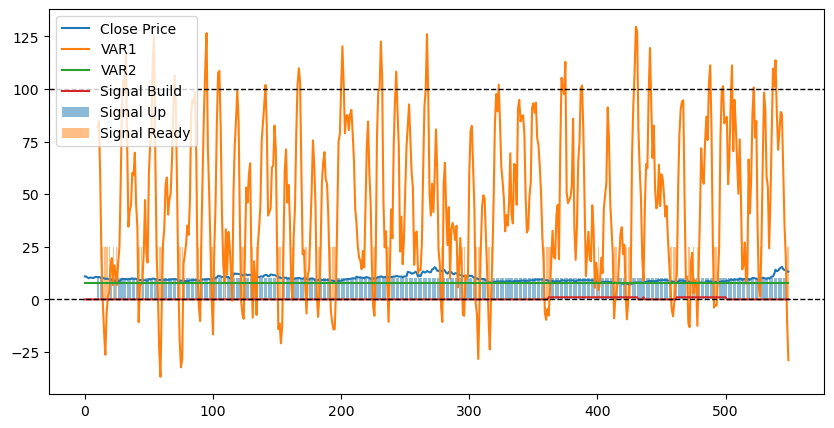

In [4]:
from addons.stock_manage.service import StockDataLoader, Stocks
import datetime
stocks = Stocks().get_stocks()
today = datetime.date.today()
day = today + datetime.timedelta(days=1)

d = StockDataLoader('300166.SZ', '2021-01-01', f'{day}')
res = d.get_stack_daily()

import talib
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
N = 5
VAR2 = 8

# 计算VAR1

# 画图
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(close, label='Close Price')
ax.plot(var1, label='VAR1')
ax.plot(np.ones_like(var1) * VAR2, label='VAR2')
ax.bar(np.arange(len(signal_up)), signal_up, label='Signal Up', alpha=0.5)
ax.bar(np.arange(len(signal_ready)), signal_ready, label='Signal Ready', alpha=0.5)
ax.plot(signal_build, label='Signal Build')
ax.axhline(0, color='k', linestyle='--', linewidth=1)
ax.axhline(100, color='k', linestyle='--', linewidth=1)
ax.legend()
plt.show()


In [5]:
from addons.stock_manage.service import StockDataLoader, Stocks
import datetime
stocks = Stocks().get_stocks()
today = datetime.date.today()
day = today + datetime.timedelta(days=1)

d = StockDataLoader('300166.SZ', '2001-01-01', f'{day}')
res = d.get_stack_daily()
import numpy as np
import pandas as pd
import talib

# 定义函数计算 A 的值
def calculate_A(close, amount, vol):
    return np.where(close > 126.32, amount / 100000, vol)

# 导入数据，包括收盘价、成交金额、成交量
data = res.to_dict()
close = np.array(data['close'])
vol = np.array(data['vol'])
amount = np.array(data['amount'])


# 计算 A 的值
A = calculate_A(close, amount, vol)

# 计算主力、游资、大户、散户的 4 种人群的移动平均线
zhuli = talib.MA(A, timeperiod=4)
youzi = talib.MA(A, timeperiod=8)
dahu = talib.MA(A, timeperiod=16)
sanhu = talib.MA(A, timeperiod=32)

# 计算主力、游资、大户、散户的人数占比
total = zhuli + youzi + dahu + sanhu
zhuli_pct = np.ceil((zhuli / total) * 100)
youzi_pct = np.ceil((youzi / total) * 100)
dahu_pct = np.ceil((dahu / total) * 100)
sanhu_pct = np.ceil((sanhu / total) * 100)

# 计算 A 的 180 日移动平均线
jingjiexian = talib.MA(A, timeperiod=180)

# 绘制 K 线图和各种人群的成交量
import mplfinance as mpf

# 定义颜色
colors = mpf.make_marketcolors(
    up='red', down='green', edge='inherit', wick='inherit', volume='inherit'
)
mpf_style = mpf.make_mpf_style(marketcolors=colors, facecolor='w', gridaxis='both')

# 绘制 K 线图
mpf.plot(data, type='candle', style=mpf_style, volume=True, ylabel='Price')

# 绘制 STICKLINE 函数以及颜色
mpf.make_addplot(zhuli, type='line', color='yellow', width=0.8, ylabel='Volume')
mpf.make_addplot(youzi, type='line', color='green', width=0.8, ylabel='Volume')
mpf.make_addplot(dahu, type='line', color='red', width=0.8, ylabel='Volume')
mpf.make_addplot(sanhu, type='line', color='blue', width=0.8, ylabel='Volume')

# 绘制主力、游资、大户、散户的成交量以不同颜色标注于 K 线图的 STICKLINE 函数上
mpf.make_addplot(zhuli, type='bar', color='blue', width=0.6)
mpf.make_addplot(youzi, type='bar', color='green', width=0.6)
mpf.make_addplot(dahu, type='bar', color='red', width=0.6)
mpf.make_addplot(sanhu, type='bar', color='blue', width=0.6)

# 绘制主力和游资的交叉点标记为“始”和“终”
mpf.make_addplot(zhuli, type='scatter', marker='s', markersize=50, color='blue', panel=0)
mpf.make_addplot(youzi, type='scatter', marker='s', markersize=50, color='green', panel=0)


TypeError: '>' not supported between instances of 'dict' and 'float'